In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import linear_model
from random import randrange
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

dt = pd.read_csv("D:/Wahidnew/Final Project/Engineering_graduate_salary.csv")

In [42]:
#Drop nonessential columns
dataset = dt.drop(["ID", "DOB", "10board", "12graduation", "12board", "CollegeID", "CollegeCityID", "CollegeCityTier","CollegeState"
,"GraduationYear"],axis=1)

In [43]:
# Converting gender value from string to integer
d_gender={'f':0, 'm':1}
dataset['Gender'] = dataset['Gender'].map(d_gender)

In [44]:
# Converting Degree value from string to integer
d_degree={'B.Tech/B.E.':0, 'MCA':1, 'MCA':2, 'M.Tech/M.E.': 3, 'M.Sc. (Tech.)':4}
dataset['Degree'] = dataset['Degree'].map(d_degree)

In [45]:
#Update null value in Degree column
# dataset.isnull().any()
dataset.Degree.median()
dataset.Degree = dataset.Degree.fillna(dataset.Degree.median())
# dataset.isnull().any()

In [46]:
# Converting Specialization value from string to integer
# dataset['Specialization'].value_counts()
d_specialization={'electronics and communication engineering':0, 
                  'computer science & engineering':1, 
                  'information technology':2, 
                  'computer engineering': 3, 
                  'computer application':4,
                  'mechanical engineering':5, 
                  'electronics and electrical engineering':6, 
                  'electronics & telecommunications': 7, 
                  'electrical engineering':8,
                  'electronics & instrumentation eng':9, 
                  'information science engineering':10, 
                  'electronics and instrumentation engineering': 11, 
                  'instrumentation and control engineering':12,
                  'civil engineering':13, 
                  'electronics engineering':14, 
                  'biotechnology': 15, 
                  'other':16,
                  'industrial & production engineering':17, 
                  'chemical engineering':18, 
                  'applied electronics and instrumentation': 19, 
                  'mechanical and automation':20,
                  'computer science and technology':21, 
                  'telecommunication engineering':22, 
                  'automobile/automotive engineering': 23, 
                  'instrumentation engineering':24,
                  'electronics and computer engineering':25, 
                  'mechatronics':26, 
                  'aeronautical engineering': 27, 
                  'industrial engineering':28,
                  'biomedical engineering':29, 
                  'metallurgical engineering':30, 
                  'ceramic engineering': 31, 
                  'embedded systems technology':32,
                  'computer and communication engineering':33, 
                  'electronics':34, 
                  'information science': 35, 
                  'control and instrumentation engineering':36,
                  'industrial & management engineering':37, 
                  'mechanical & production engineering':38, 
                  'computer networking': 39, 
                  'electrical and power engineering':40,
                  'information & communication technology':41
                 }
dataset['Specialization'] = dataset['Specialization'].map(d_specialization)

In [47]:
dataset.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0.0,12,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0.0,1,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0.0,7,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0.0,1,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0.0,15,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [48]:
print("Average Salary of male: ",int(dataset.loc[dataset['Gender'] == 1, 'Salary'].mean()))
print("Average Salary of female: ",int(dataset.loc[dataset['Gender'] == 0, 'Salary'].mean()))

Average Salary of male:  309804
Average Salary of female:  290418


Text(0.5, 1.0, 'Candidate gender: Male and Female')

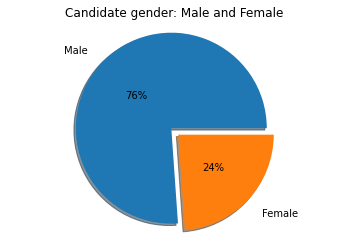

In [49]:
#Gender(Male - Female ratio)
gender = dataset["Gender"]
male  = (len(gender[dataset["Gender"] == 1]))
female  = (len(gender[dataset["Gender"] == 0]))
sizes = [male, female]
labels = 'Male', 'Female'
explode = (0, 0.1)
plt.pie (sizes, labels=labels, explode=explode, shadow=True, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.axis('equal')
plt.title("Candidate gender: Male and Female")

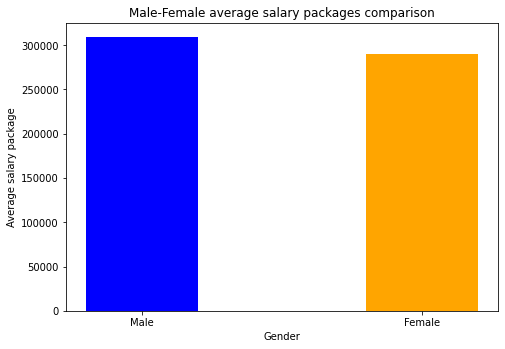

In [50]:
# Average salary of male and female
# bar = dataset.groupby('Gender', as_index=False).Salary.mean().set_index('Gender')
male   = int(dataset.loc[dataset['Gender'] == 1, 'Salary'].mean())
female = int(dataset.loc[dataset['Gender'] == 0, 'Salary'].mean())
figc = plt.figure()
c = figc.add_axes([0,0,1,1])
lables = ['Male', 'Female']
salary_package = [male, female]
c.bar(lables,salary_package, width=0.4, color=['blue', 'orange'])
plt.title('Male-Female average salary packages comparison')
plt.xlabel('Gender')
plt.ylabel('Average salary package')
plt.show()

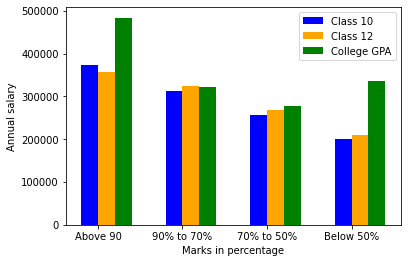

In [51]:
# 10th, 12th Standard and University GPA student marks(%) counts and their salary package
above_90_a  = int(dataset.loc[dataset['10percentage'] > 90, 'Salary'].mean())
bet_90_70_a = int(dataset.loc[((dataset['10percentage'] < 90) & (dataset['10percentage'] > 70)), 'Salary'].mean())
bet_70_50_a = int(dataset.loc[((dataset['10percentage'] < 70) & (dataset['10percentage'] > 50)), 'Salary'].mean())
bel_50_a = int(dataset.loc[dataset['10percentage'] < 50, 'Salary'].mean())

above_90_b  = int(dataset.loc[dataset['12percentage'] > 90, 'Salary'].mean())
bet_90_70_b = int(dataset.loc[((dataset['12percentage'] < 90) & (dataset['12percentage'] > 70)), 'Salary'].mean())
bet_70_50_b = int(dataset.loc[((dataset['12percentage'] < 70) & (dataset['12percentage'] > 50)), 'Salary'].mean())
bel_50_b = int(dataset.loc[dataset['12percentage'] < 50, 'Salary'].mean())

above_90_c  = int(dataset.loc[dataset['collegeGPA'] > 90, 'Salary'].mean())
bet_90_70_c = int(dataset.loc[((dataset['collegeGPA'] < 90) & (dataset['collegeGPA'] > 70)), 'Salary'].mean())
bet_70_50_c = int(dataset.loc[((dataset['collegeGPA'] < 70) & (dataset['collegeGPA'] > 50)), 'Salary'].mean())
bel_50_c = int(dataset.loc[dataset['collegeGPA'] < 50, 'Salary'].mean())

a = [above_90_a, bet_90_70_a, bet_70_50_a, bel_50_a]
b = [above_90_b, bet_90_70_b, bet_70_50_b, bel_50_b]
c = [above_90_c, bet_90_70_c, bet_70_50_c, bel_50_c]
X = np.arange(4)
width = 0.2
fig, ax = plt.subplots()
ax.bar(X, a, width, color='blue', label='Class 10')
ax.bar(X+width, b, width, color='orange', label='Class 12')
ax.bar(X+width+width, c, width, color='green', label='College GPA')
ax.legend(loc="upper right")
ax.set_xticks(X + width / 2)
ax.set_xticklabels(('Above 90', '90% to 70%', '70% to 50%', 'Below 50%'))
plt.ylabel('Annual salary')
plt.xlabel('Marks in percentage')
# plt.title('Class 10 and 12 marks salary package')
plt.show()


Text(0.5, 1.0, 'College tier')

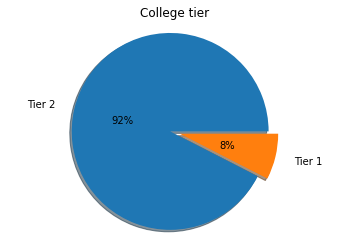

In [52]:
# College Tier
tier = dataset["CollegeTier"]
tier1  = (len(tier[dataset["CollegeTier"] == 1]))
tier2  = (len(tier[dataset["CollegeTier"] == 2]))
sizes = [tier2, tier1,]
labels = 'Tier 2', 'Tier 1'
explode = (0, 0.1)
plt.pie (sizes, labels=labels, explode=explode, shadow=True, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.axis('equal')
plt.title("College tier")

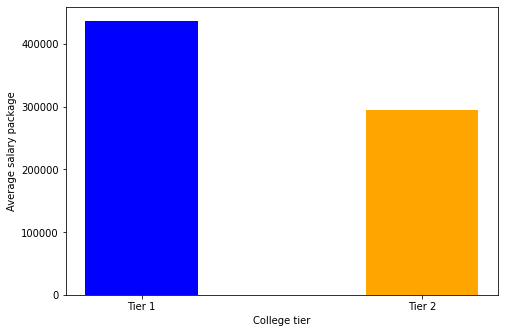

In [53]:
# Find which tier college students get maximum salary(average) package
tier1_sal   = int(dataset.loc[dataset['CollegeTier'] == 1, 'Salary'].mean())
tier2_sal = int(dataset.loc[dataset['CollegeTier'] == 2, 'Salary'].mean())
figc = plt.figure()
c = figc.add_axes([0,0,1,1])
lables = ['Tier 1', 'Tier 2']
salary_package = [tier1_sal, tier2_sal]
c.bar(lables,salary_package, width=0.4, color=['blue', 'orange'])
# plt.title('College tier average salary packages comparison')
plt.xlabel('College tier')
plt.ylabel('Average salary package')
plt.show()

# print(dataset.loc[dataset['CollegeTier'] == 1, 'Salary'].mean()) #Avg. salary of Tier 1 college student
# print((len(tier[dataset["CollegeTier"] == 2]))) #Avg. salary of Tier 2 college student
#AMCAT English marks and salary package comparisons
# plt.scatter(dataset['English'], dataset['Salary'], alpha=0.5)
# plt.xlabel('AMCAT English marks')
# plt.ylabel('Average salary package(lakhs)')
# plt.show()
#AMCAT Logical marks and salary package comparisons
# plt.scatter(dataset['Logical'], dataset['Salary'], alpha=0.5)
# plt.xlabel('AMCAT Logical marks')
# plt.ylabel('Average salary package(lakhs)')
# plt.show()
#AMCAT Quant marks and salary package comparisons
# plt.scatter(dataset['Quant'], dataset['Salary'], alpha=0.5)
# plt.xlabel('AMCAT Quant marks')
# plt.ylabel('Average salary package(lakhs)')
# plt.show()

<AxesSubplot:>

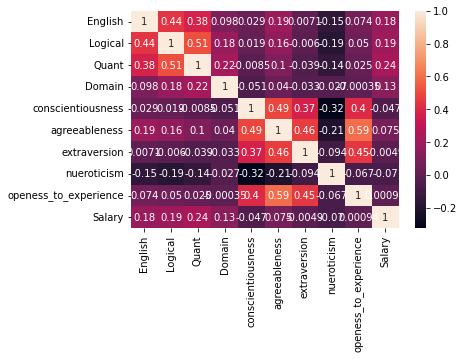

In [54]:
#AMCAT modules marks and salary package comparisons
amcat_score_dataset = dataset.copy()
amcat_score_dataset = amcat_score_dataset.drop(['Gender','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg', '10percentage','12percentage','CollegeTier','Degree','Specialization','collegeGPA'], axis=1)
x = amcat_score_dataset.corr()
sns.heatmap(x, annot=True)

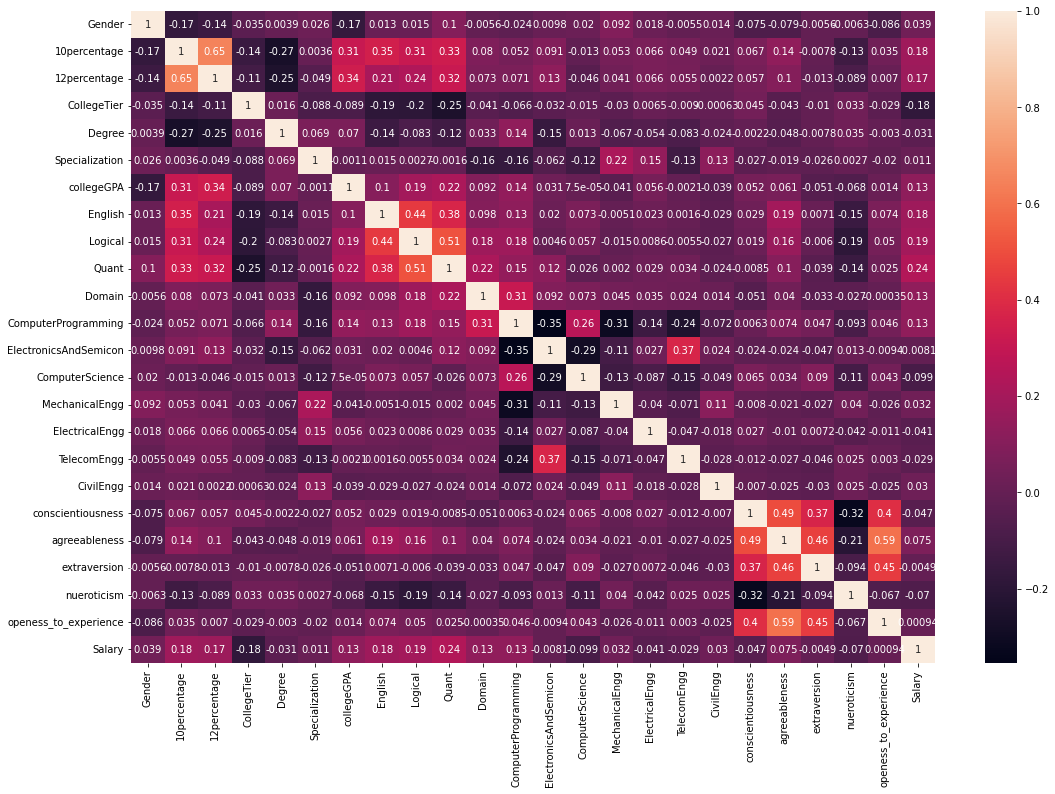

In [55]:
# amcat_score_dataset = dataset.copy()
# amcat_score_dataset = amcat_score_dataset.drop(['Gender','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg', '10percentage','12percentage','CollegeTier','Degree','Specialization','collegeGPA'], axis=1)
# x = dataset.corr()
# sns.heatmap(x)

fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(dataset.corr(), ax=ax, annot=True)
plt.show()

In [56]:
dataset.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0.0,12,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0.0,1,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0.0,7,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0.0,1,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0.0,15,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [57]:
#Unsupervised Analysis
# Scaling data
X = dataset.values[:, 8:10] #Logical and Quant marks
Y = dataset.values[:,23] #Salary
scaled_data = scale(X)   #scaling X : Logical and Quant marks
# Y = scale(Y)
# print(Y)

In [58]:
# K-means clustering 2 to 30
n_samples, n_features = scaled_data.shape

sillhoute = []
completenes = []
homogeneity = []

inertia = []

n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
for k in range(2, 30):
 kmeans = cluster.KMeans(n_clusters=k)
 y_fit = kmeans.fit_predict(scaled_data)
#  print(k)
#  print(y_fit)
#  print(metrics.silhouette_score(scaled_data, kmeans.labels_))
#  print(metrics.completeness_score(Y2, kmeans.labels_))
#  print(metrics.homogeneity_score(Y2, kmeans.labels_))
#  print("   ")
 sillhoute.append(metrics.silhouette_score(scaled_data, kmeans.labels_))
 completenes.append(metrics.completeness_score(Y2, kmeans.labels_))
 homogeneity.append(metrics.homogeneity_score(Y2, kmeans.labels_))
 inertia.append(kmeans.inertia_)
print("K-means algorithm processed")

K-means algorithm processed


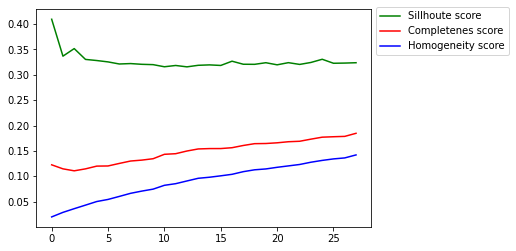

In [59]:
# Performance of K-means cluster
# plt.plot(sillhoute,'g*', completenes, 'ro', homogeneity, '--')
plt.plot(sillhoute, color='green', label='Sillhoute score')
plt.plot(completenes, color='red', label='Completenes score')
plt.plot(homogeneity, color='blue', label='Homogeneity score')
plt.legend(bbox_to_anchor=(1, 0.9), loc='center left', ncol=1)
plt.show()

In [60]:
#Determine the number of clusters
plt.plot(wcss, marker='x')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\hp\AppData\Local\Temp\ipykernel_15636\3932034834.py", line 2, in <cell line: 2>
    plt.plot(wcss, marker='x')
NameError: name 'wcss' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structured_t

In [61]:
#6 clusters 
kmeans = cluster.KMeans(n_clusters=6).fit(scaled_data)
# y_fit = kmeans.fit(scaled_data)
dataset['labels'] = kmeans.labels_
# print(kmeans.labels_)
# kmeans.cluster_centers_
print("Silhouette score", metrics.silhouette_score(scaled_data, kmeans.labels_))
print("Homogeneity score", metrics.homogeneity_score(Y2, kmeans.labels_))
print("Completeness score", metrics.completeness_score(Y2, kmeans.labels_))

Silhouette score 0.32892459478697905
Homogeneity score 0.04994974146229131
Completeness score 0.11949644786713809


In [62]:
kml = kmeans.labels_
print(np.unique(kml))
print("Number of clusters: ",len(np.unique(kml)))

[0 1 2 3 4 5]
Number of clusters:  6


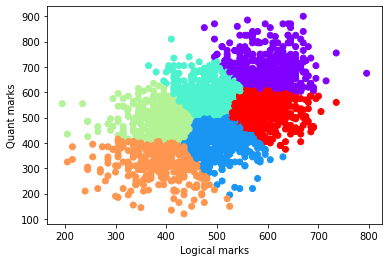

In [63]:
#cluster visulization
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Logical marks')
plt.ylabel('Quant marks')
plt.show()

In [64]:
#Supervised Analysis
##Single value linear regressiona
##Making dataset for single value supervised analysis
logical_df = dataset.drop(['Gender','10percentage','12percentage','CollegeTier','Degree','Specialization','collegeGPA','English','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary', 'labels'],axis='columns')
quant_df = dataset.drop(['Gender','CollegeTier', '10percentage', '12percentage','Degree','Specialization','collegeGPA','English','Logical','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary', 'labels'],axis='columns')
salary = dataset.Salary
# dataset.head()

In [65]:
#Salary prediction based on Logical marks
reg = linear_model.LinearRegression()
reg.fit(logical_df,salary)

LinearRegression()

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


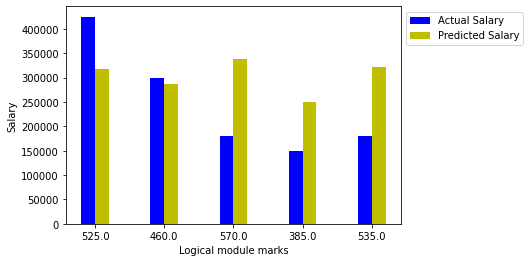

In [66]:
# Annual salary actual and prediction comparison for 5 random students with their AMCAT Logical marks from dataset.
logical_marks = []
actual_salary = []
predicted_salary = []

ranadom_df = dataset.sample(n=5)
for i, row in ranadom_df.iterrows():
    logical_marks.append(row['Logical'])
    actual_salary.append(row['Salary'])
    predicted_salary.append((reg.predict([[row['Logical']]])).astype(int)[0])


X = np.arange(5)
width = 0.2
salary_legend=['Actual Salary','Predicted Salary']
fig, ax = plt.subplots()
ax.bar(X, actual_salary, width, color='blue')
ax.bar(X+width, predicted_salary, width, color='y')
ax.set_xticks(X + width / 2)
ax.set_xticklabels(logical_marks)
plt.xlabel("Logical module marks")
plt.ylabel('Salary')
# plt.title('Actual and Predected Salary')
plt.legend(salary_legend, bbox_to_anchor=(1, 0.9), loc='center left', ncol=1)
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


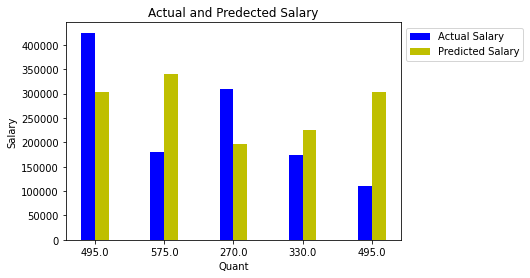

In [67]:
# Annual actual salary and predicted comparison for 5 random students with their AMCAT Quantitive marks from dataset.
quant = []
actual_salary = []
predicted_salary = []

ranadom_df = dataset.sample(n=5)
for i, row in ranadom_df.iterrows():
    quant.append(row['Quant'])
    actual_salary.append(row['Salary'])
    predicted_salary.append((reg.predict([[row['Quant']]])).astype(int)[0])
    

X = np.arange(5)
width = 0.2
salary_legend=['Actual Salary','Predicted Salary']
fig, ax = plt.subplots()
ax.bar(X, actual_salary, width, color='blue')
ax.bar(X+width, predicted_salary, width, color='y')
ax.set_xticks(X + width / 2)
ax.set_xticklabels(quant)
plt.xlabel("Quant")
plt.ylabel('Salary')
plt.title('Actual and Predected Salary')
plt.legend(salary_legend, bbox_to_anchor=(1, 0.9), loc='center left', ncol=1)
plt.show()


In [68]:
##Multiple value linear regression
multi_reg_df = dataset.drop(['Gender','Degree','CollegeTier','Specialization','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg'])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\hp\AppData\Local\Temp\ipykernel_15636\138874630.py", line 2, in <cell line: 2>
    multi_reg_df = dataset.drop(['Gender','Degree','CollegeTier','Specialization','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg'])
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\pandas\core\frame.py", line 4954, in drop
    return super().drop(
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\pandas\core\generic.py", line 4267, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "C:\Users\hp\AppData\Roaming\Python\Pyt

In [69]:
# multi_reg_df
reg = linear_model.LinearRegression()
reg.fit(multi_reg_df,dataset.Salary)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\hp\AppData\Local\Temp\ipykernel_15636\138822635.py", line 3, in <cell line: 3>
    reg.fit(multi_reg_df,dataset.Salary)
NameError: name 'multi_reg_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return Verbo

In [70]:
LinearRegression()
# Annual actual salary and predicted comparison for 5 random students with multiple columns from dataset.
ranadom_df = dataset.sample(n=5)
candidate = []
actual_salary = []
predicted_salary = []
count = 1


for i, row in ranadom_df.iterrows():
    val = "Candidate "+str(count)
    candidate.append(val)
    actual_salary.append(row['Salary'])
    pred_salary = reg.predict([[row['10percentage'], row['12percentage'], row['collegeGPA'], row['English'], row['Logical'], row['Quant'], row['Domain']]])
    predicted_salary.append(pred_salary.astype(int)[0])
    count+= 1
      
X = np.arange(5)
width = 0.2
salary_legend=['Actual Salary','Predicted Salary']
fig, ax = plt.subplots()
ax.bar(X, actual_salary, width, color='blue')
ax.bar(X+width, predicted_salary, width, color='y')
ax.set_xticks(X + width / 2)
ax.set_xticklabels(candidate)
# plt.xlabel("Quant")
plt.ylabel('Salary')
plt.title('Actual and Predected Salary')
plt.legend(salary_legend, bbox_to_anchor=(1, 0.9), loc='center left', ncol=1)
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\hp\AppData\Local\Temp\ipykernel_15636\4148006506.py", line 1, in <cell line: 1>
    LinearRegression()
NameError: name 'LinearRegression' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structur

In [71]:
# Mean Absolute Error (MAE)
mae = 0
for x in range(5):
  j = actual_salary[x] - predicted_salary[0]
  if j < 0:
    j = j * (-1)
  
  mae = mae + j

print("Predictions are off by approximately :INR",mae/5)

Predictions are off by approximately :INR 114523.2


In [72]:
#Predictions are off by approximately :INR 77806.6
